In [92]:
%%capture
! pip install xclim

In [93]:
import xesmf
import xarray as xr
import numpy as np
from science_validation_manual import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sbn

In [94]:
import rhg_compute_tools.kubernetes as rhgk

In [95]:
client, cluster = rhgk.get_micro_cluster()

In [96]:
#cluster.scale(100)

In [97]:
cluster

In [76]:
# from workflow : https://argo.cildc6.org/workflows/default/create-pr-references-devz4kcf?tab=workflow&nodeId=create-pr-references-devz4kcf-3122012969&nodePanelView=inputs-outputs

datadict = {
    'fineref-zarr': 'gs://scratch-170cd6ec/a0d30c46-d933-4414-951c-66e4d8e1da79/create-pr-references-devz4kcf-4066270298/regridded.zarr',
    'coarseref-zarr': 'gs://scratch-170cd6ec/a0d30c46-d933-4414-951c-66e4d8e1da79/create-pr-references-devz4kcf-263651007/regridded.zarr',
    'wdf-correction-zarr': 'gs://scratch-170cd6ec/a0d30c46-d933-4414-951c-66e4d8e1da79/create-pr-references-devz4kcf-886891430/wdf_precorrection.zarr',
    'fineref-out-zarr': 'gs://scratch-170cd6ec/a0d30c46-d933-4414-951c-66e4d8e1da79/create-pr-references-devz4kcf-3202591857/fineref_wdf_precorrected.zarr',
    'coarseref-out-zarr': 'gs://scratch-170cd6ec/a0d30c46-d933-4414-951c-66e4d8e1da79/create-pr-references-devz4kcf-654556944/coarseref_wdf_precorrected.zarr',
    'ref': 'gs://clean-b1dbca25/reanalysis/ERA-5/F320/pr.1995-2015.F320.zarr'
}

In [77]:
for key, val in datadict.items():
    datadict[key] = read_gcs_zarr(val)['pr']

In [78]:
m = datadict['wdf-correction-zarr'].isel(time=0).compute()
f = datadict['fineref-zarr'].isel(time=0).compute()
fm = datadict['fineref-out-zarr'].isel(time=0).compute()
c = datadict['coarseref-zarr'].isel(time=0).compute()
cm = datadict['coarseref-out-zarr'].isel(time=0).compute()

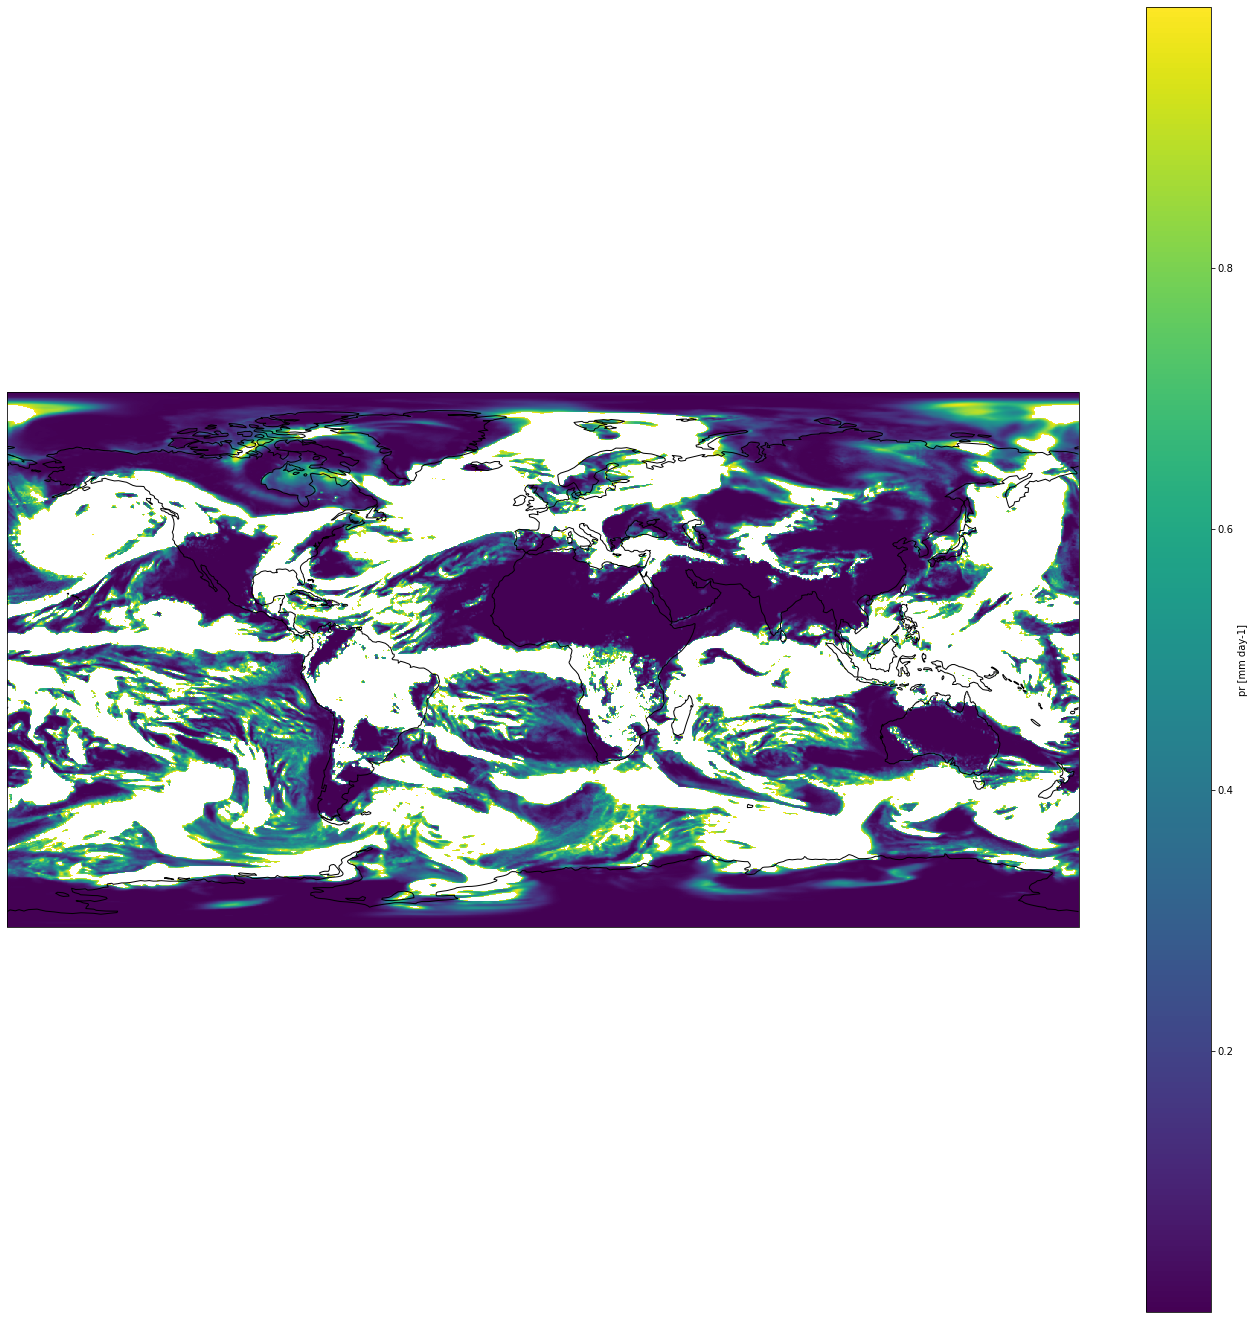

In [81]:
simple_plot(f.where(f<1)) # data points to be corrected are colored, others are all white

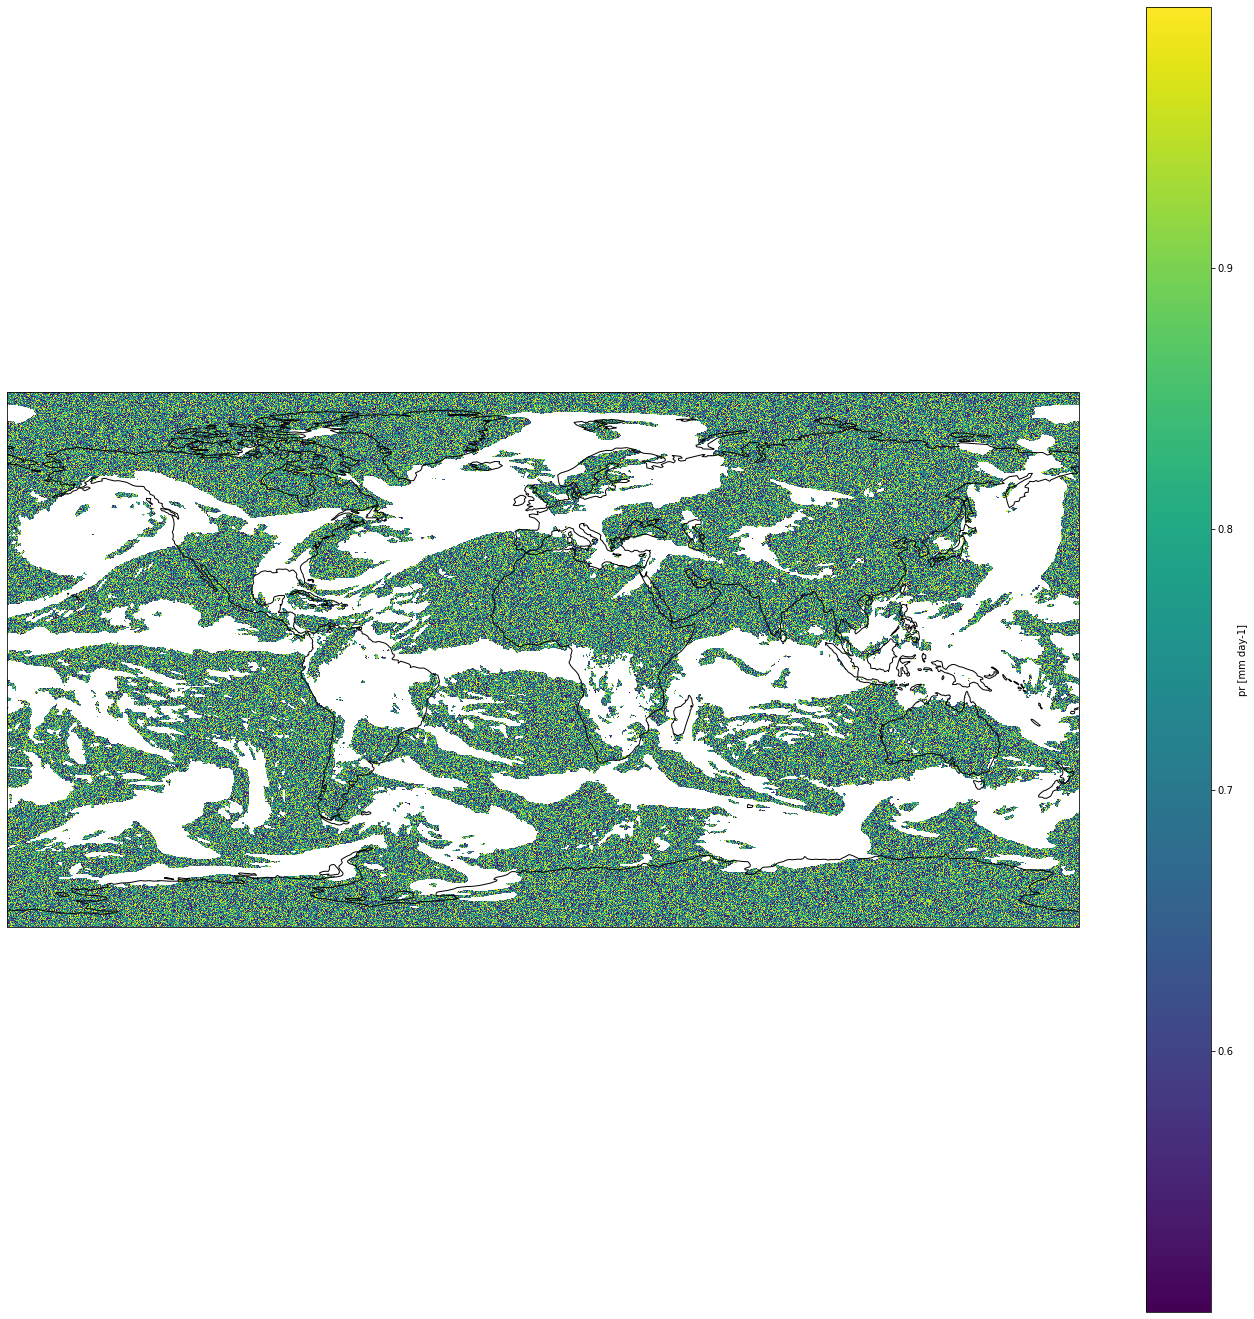

In [82]:
simple_plot(m.where(m!=False)) # data points to be used from mask are colored

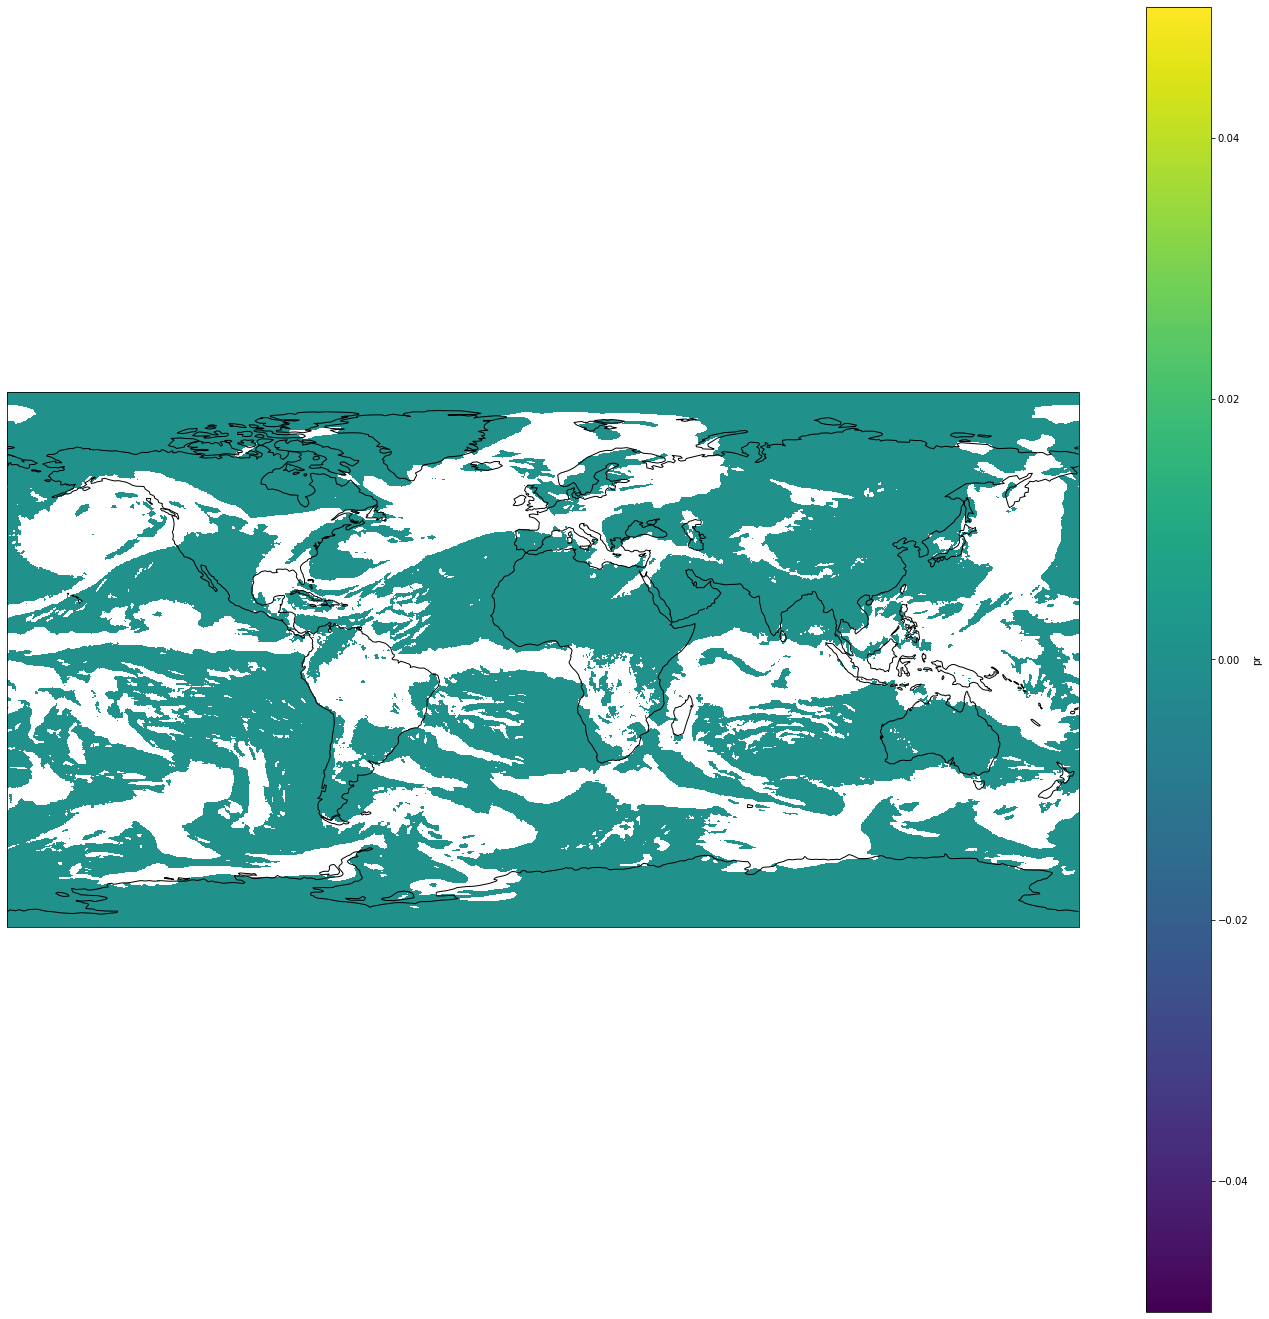

In [90]:
simple_plot(fm-m.where(m!=False)) # diff between fine workflow output and mask, below threshold where mask should be applied. Should be all zeros. 

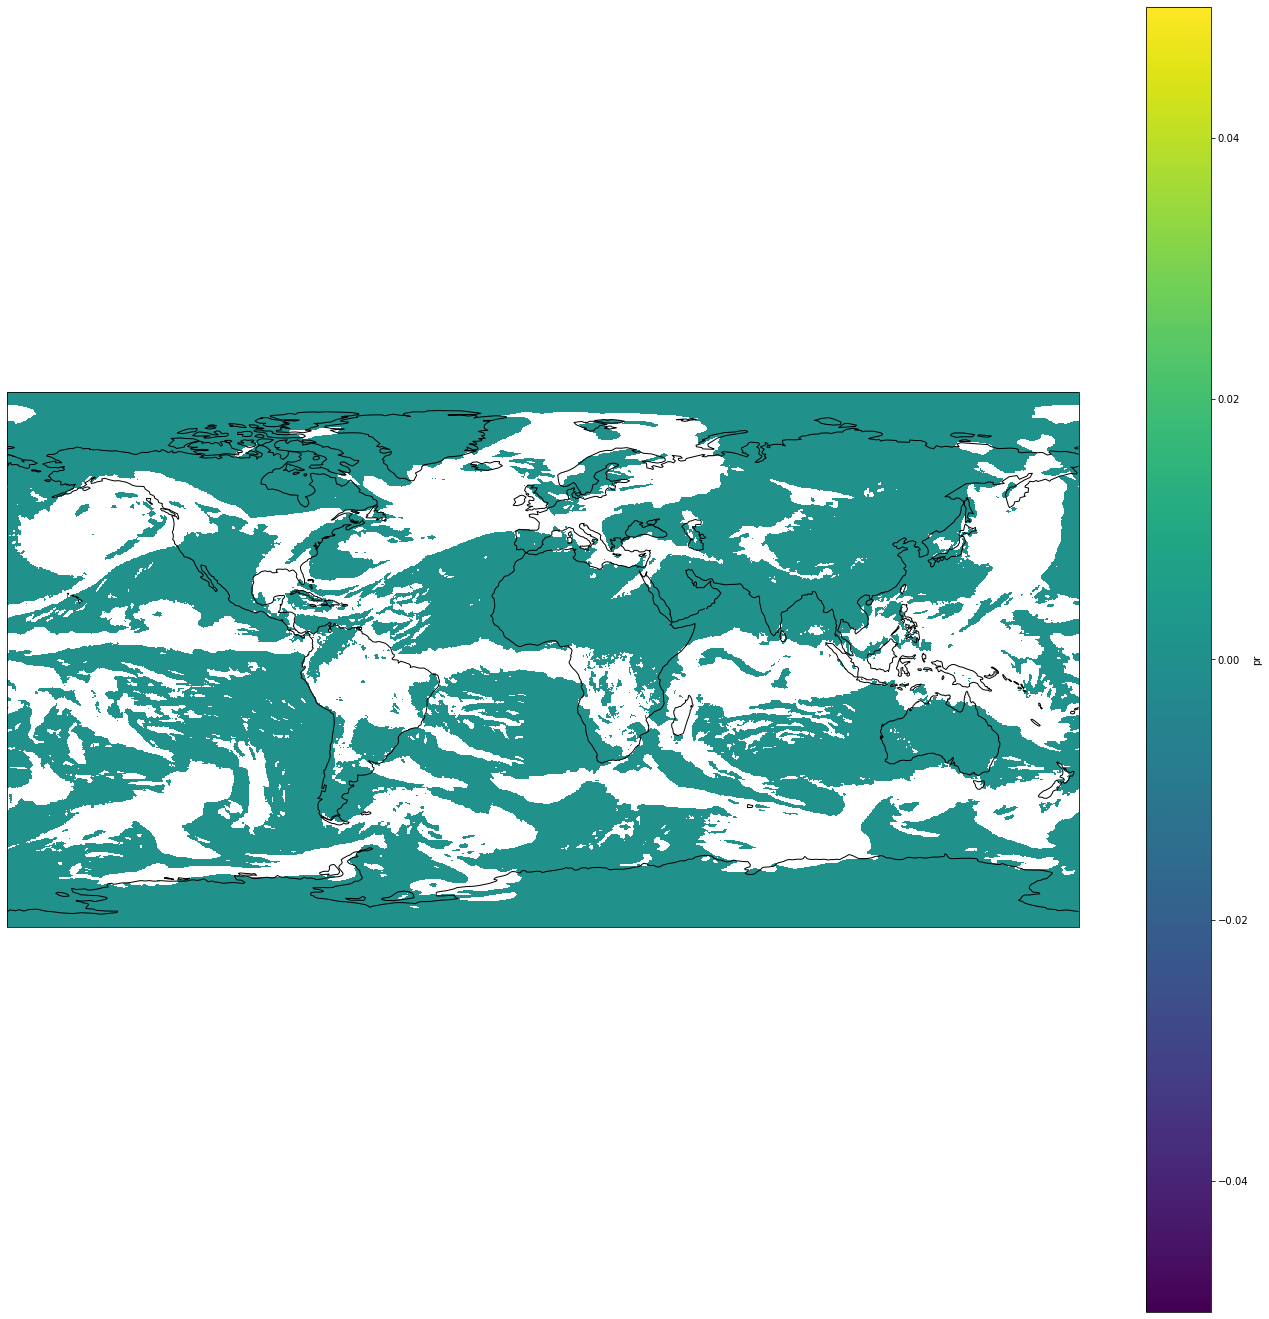

In [89]:
simple_plot((fm-cm).where(fm<1),'') # diff between fine workflow output and coarse workflow output where mask should be applied. Should be all zeros.

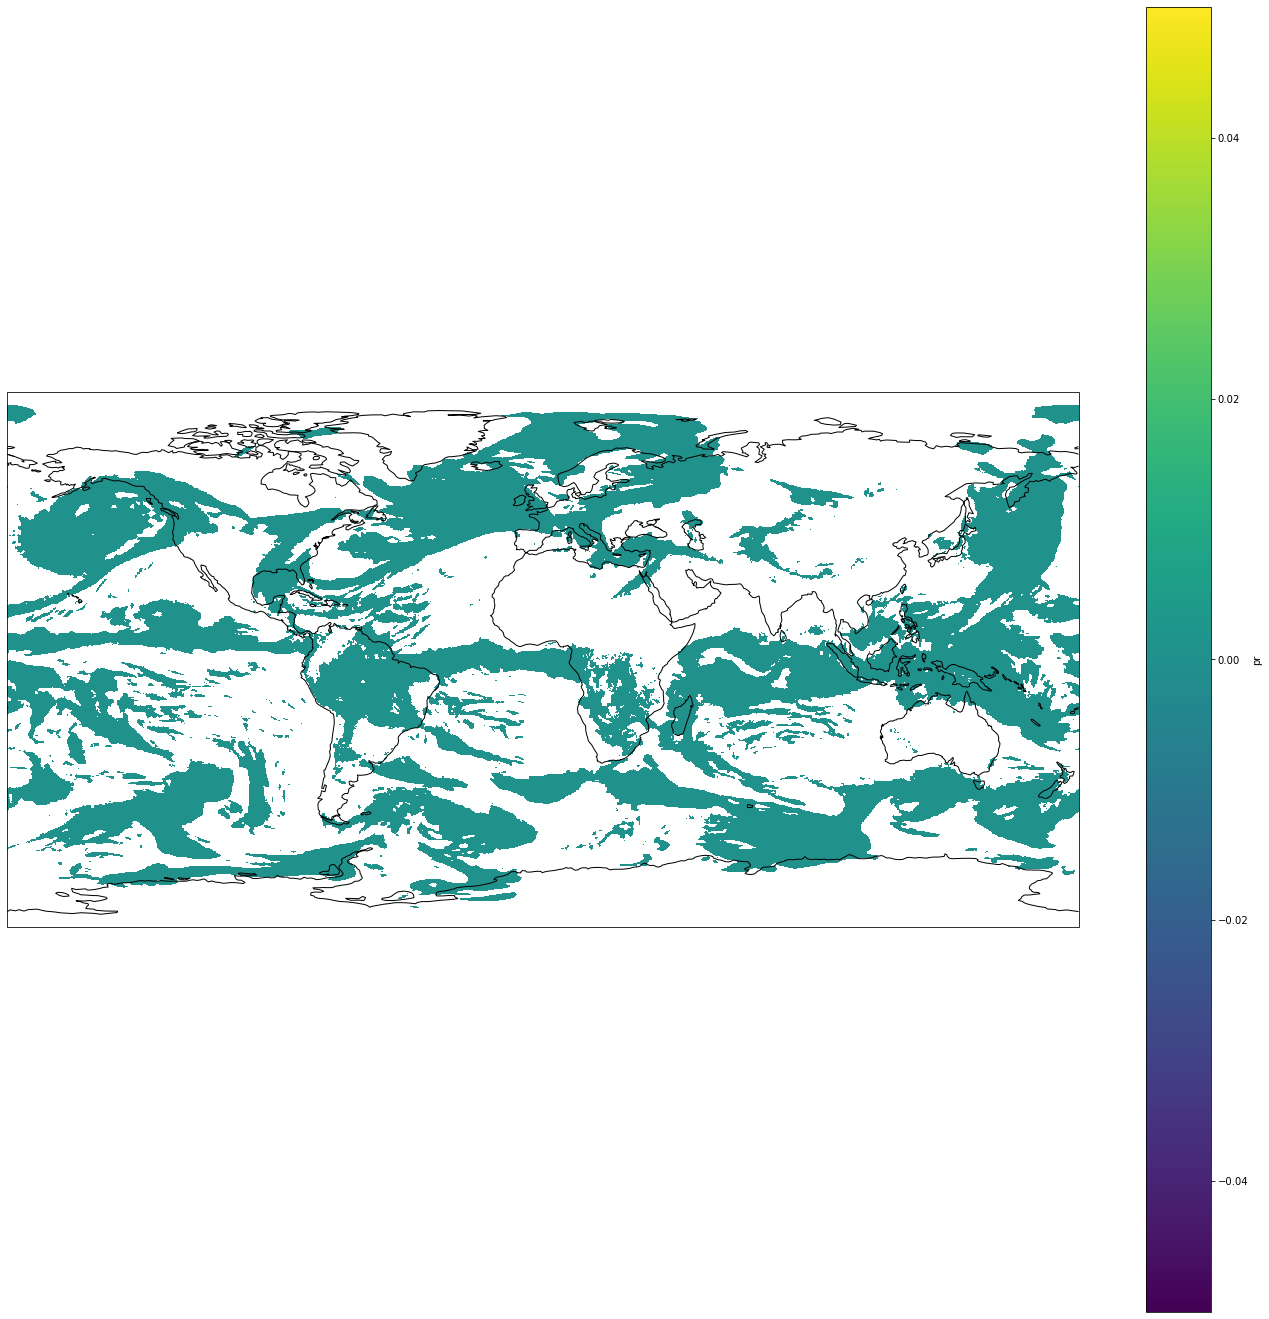

In [88]:
simple_plot(fm-f.where(f>=1), '') # (fine) diff between w and w/o WDF where correction shouldn't be applied. Should be all zeros. 

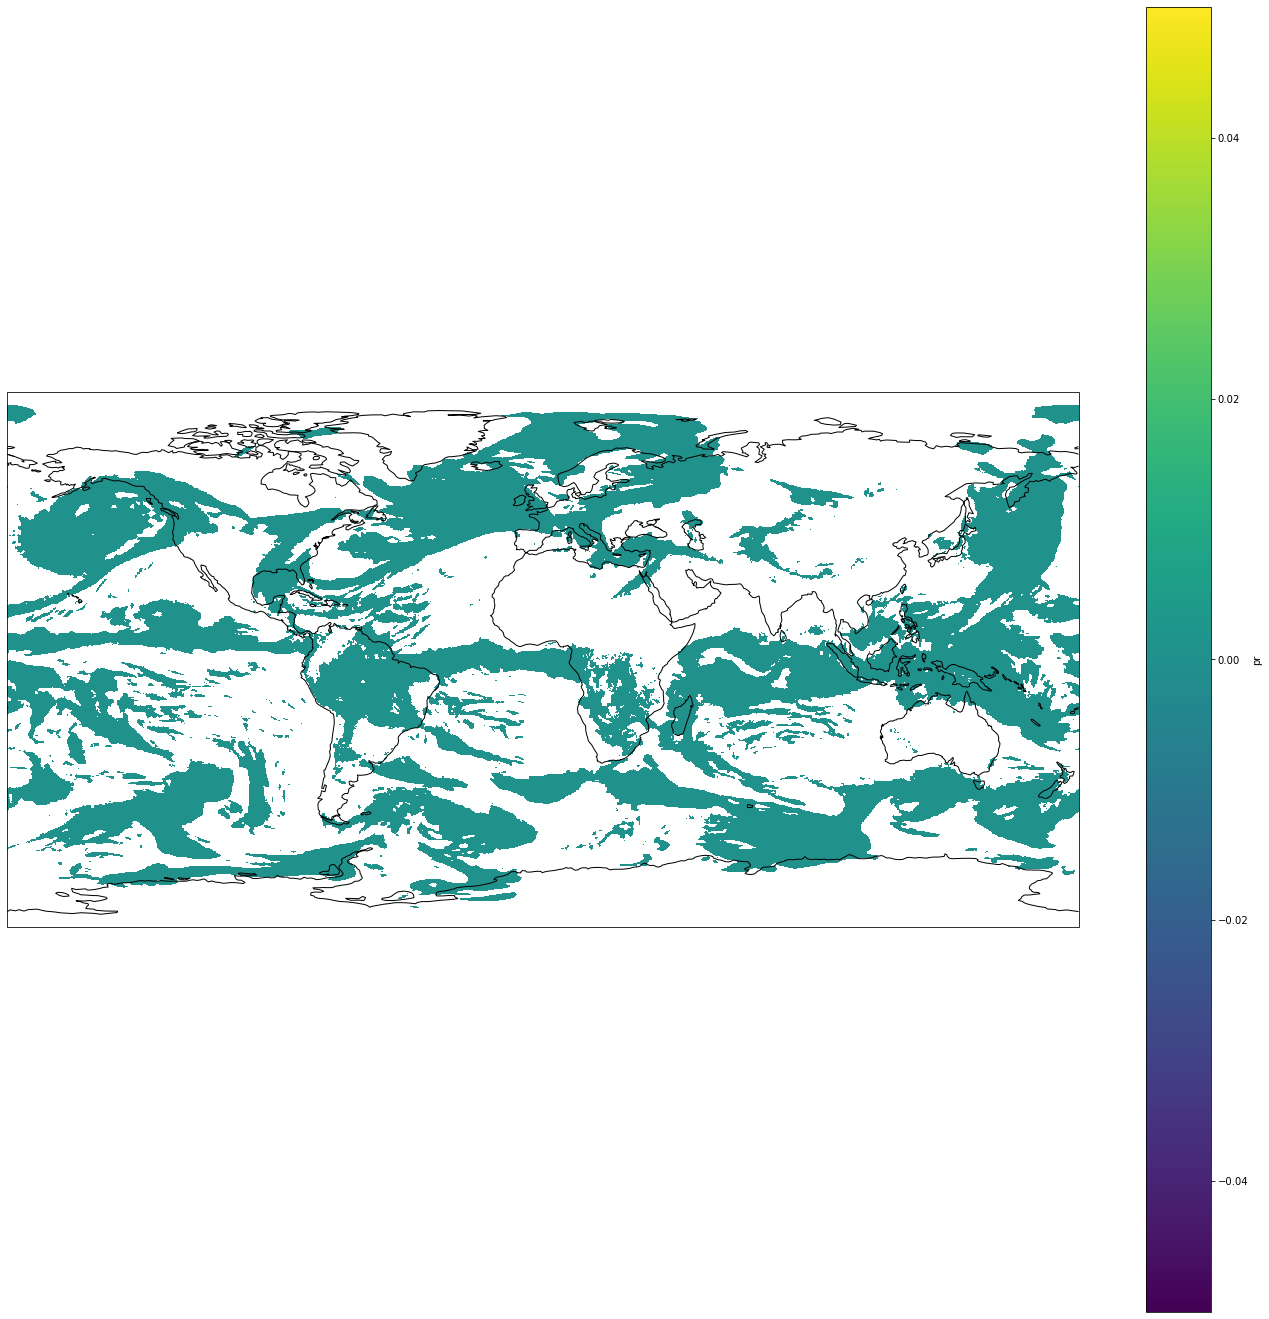

In [87]:
simple_plot(cm-c.where(f>=1), '') # (coarse) diff between w and w/o WDF where correction shouldn't be applied. Should be all zeros. 